/var/folders/6x/z6jhwns52n756slnn93nn5zm0000gn/T/ipykernel_6413/2839935006.py:36: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  color_map_total = cm.get_cmap("tab10", len(diet_groups))
/var/folders/6x/z6jhwns52n756slnn93nn5zm0000gn/T/ipykernel_6413/2839935006.py:52: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  color_map_age = cm.get_cmap("tab10", len(age_order))


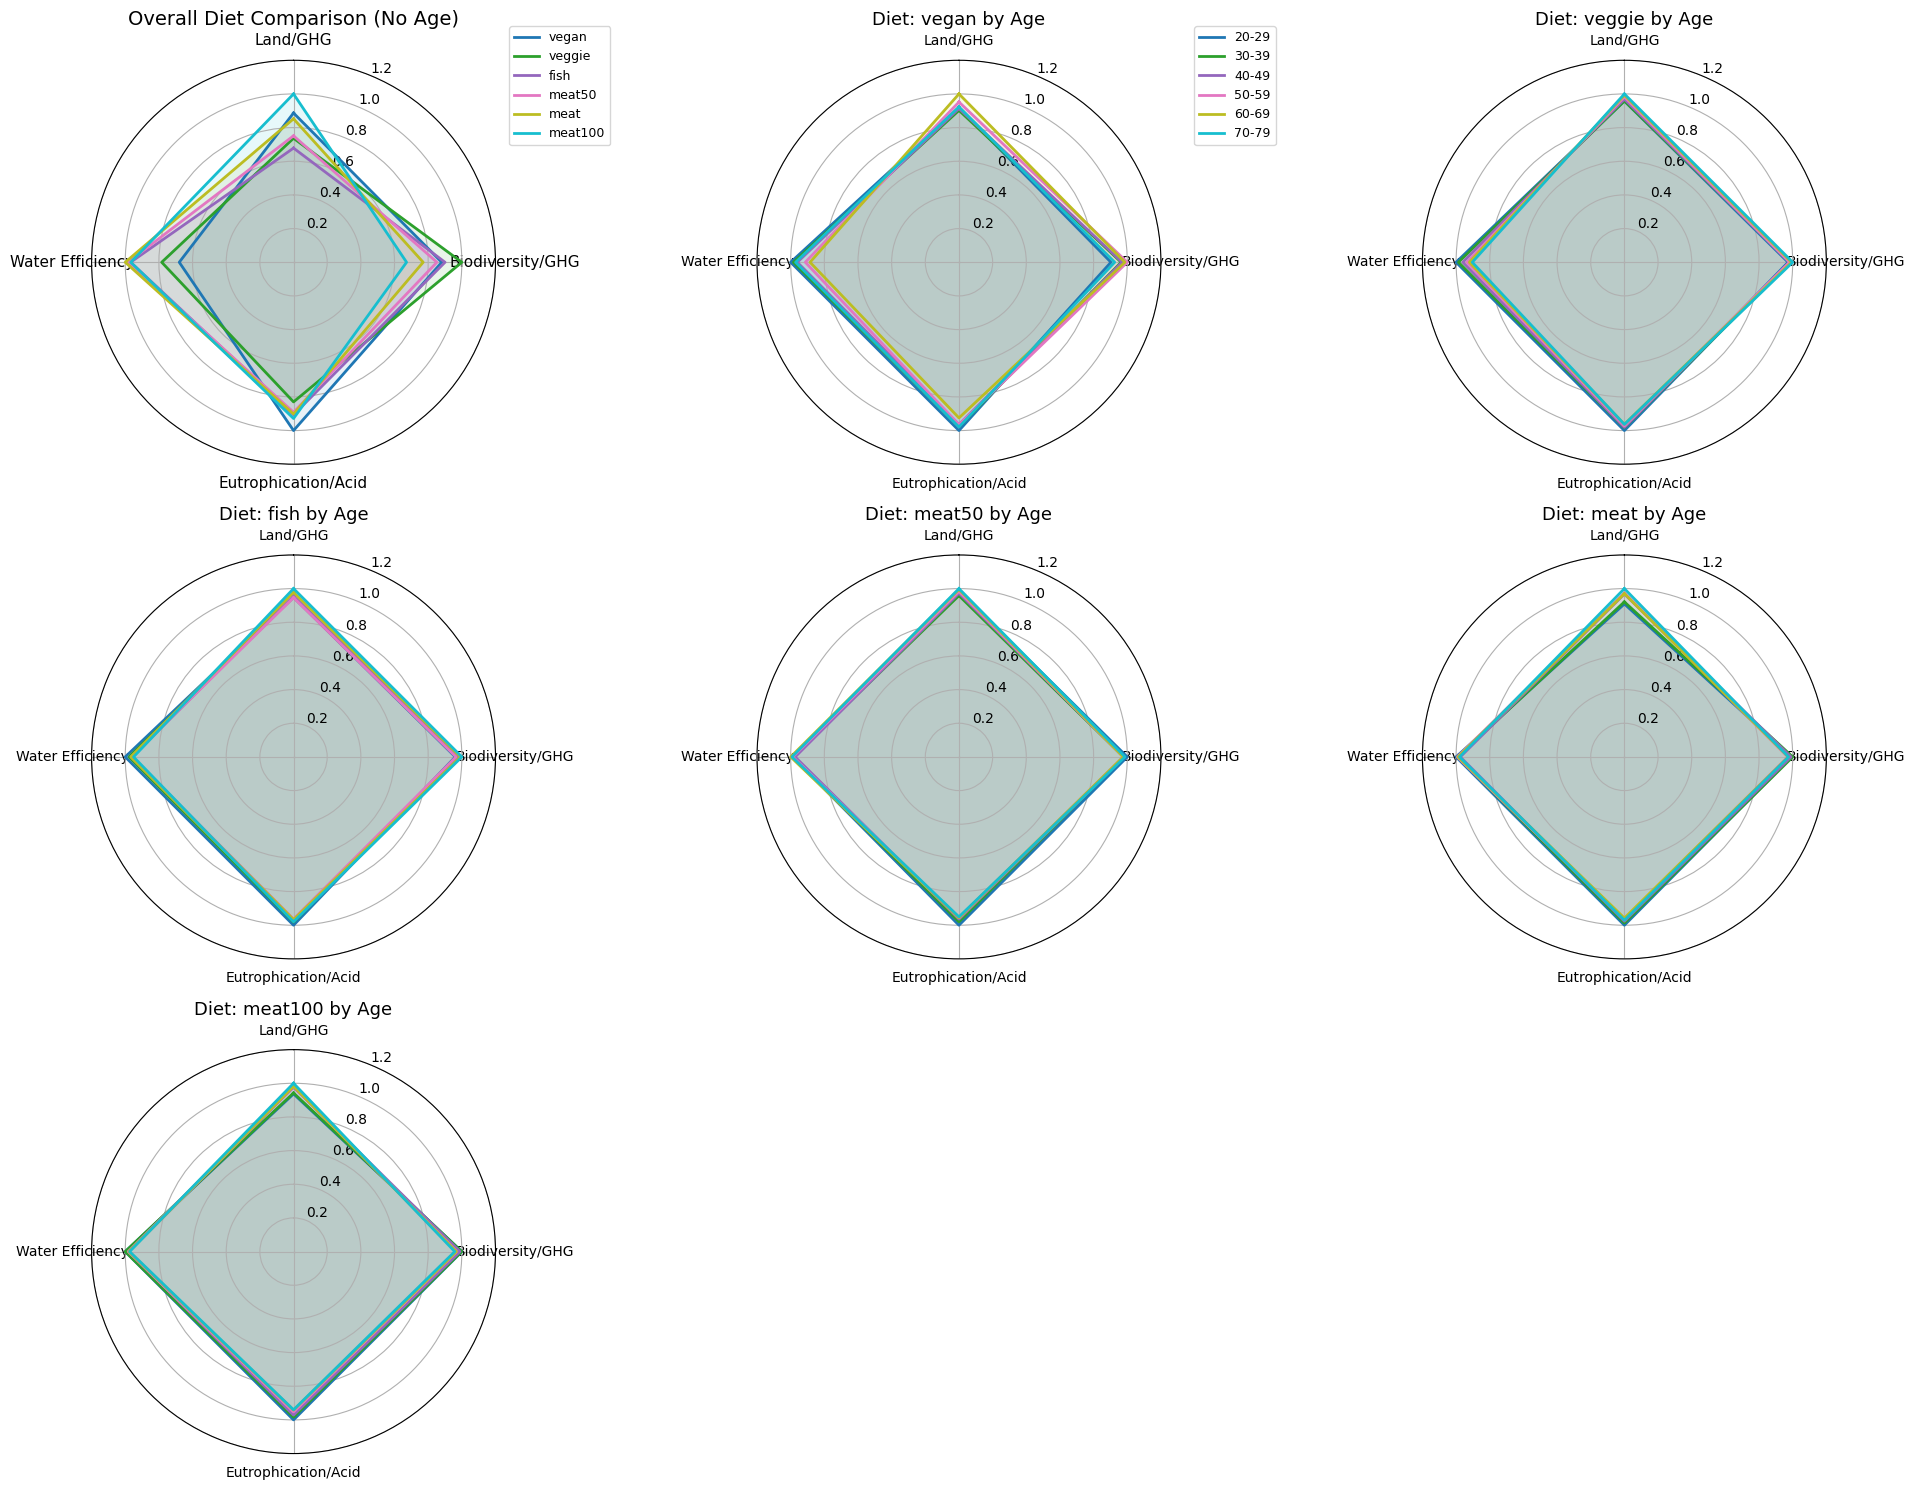

In [15]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.cm as cm

df = pd.read_csv("Results_21MAR2022_nokcaladjust.csv")

# 定义年龄组和饮食类型
age_order = ["20-29", "30-39", "40-49", "50-59", "60-69", "70-79"]
diet_groups = ["vegan", "veggie", "fish", "meat50", "meat", "meat100"]

# 结构性指标
df["land_per_ghg"] = df["mean_land"] / df["mean_ghgs"]
df["bio_per_ghg"] = df["mean_bio"] / df["mean_ghgs"]
df["eut_per_acid"] = df["mean_eut"] / df["mean_acid"]
df["watuse_per_watscar"] = df["mean_watuse"] / df["mean_watscar"]

metrics = ["land_per_ghg", "bio_per_ghg", "eut_per_acid", "watuse_per_watscar"]
labels = ["Land/GHG", "Biodiversity/GHG", "Eutrophication/Acid", "Water Efficiency"]
angles = np.linspace(0, 2 * np.pi, len(metrics), endpoint=False).tolist()
angles += angles[:1]

# 设置图形布局（7个子图：1个总图 + 6个饮食组年龄图）
fig, axes = plt.subplots(3, 3, subplot_kw={'polar': True}, figsize=(20, 15))
axes = axes.flatten()

# 第一个图 (不区分年龄的总图)
ax = axes[0]
total_grouped = df.groupby("diet_group")[metrics].mean().loc[diet_groups]

# 标准化
norm_total = total_grouped.copy()
for metric in metrics:
    norm_total[metric] /= norm_total[metric].max()

color_map_total = cm.get_cmap("tab10", len(diet_groups))

for idx, diet in enumerate(diet_groups):
    values = norm_total.loc[diet].tolist()
    values += values[:1]
    ax.plot(angles, values, label=diet, color=color_map_total(idx), linewidth=2)
    ax.fill(angles, values, alpha=0.1, color=color_map_total(idx))

ax.set_title("Overall Diet Comparison (No Age)", size=14)
ax.set_theta_offset(np.pi / 2)
ax.set_theta_direction(-1)
ax.set_thetagrids(np.degrees(angles[:-1]), labels, fontsize=11)
ax.set_ylim(0, 1.2)
ax.legend(loc='upper right', bbox_to_anchor=(1.3, 1.1), fontsize=9)

# 后续6个图 (按饮食组区分年龄)
color_map_age = cm.get_cmap("tab10", len(age_order))

for idx, diet in enumerate(diet_groups):
    ax = axes[idx + 1]  # 从第二个位置开始
    subset = df[df["diet_group"] == diet]
    subset_grouped = subset.groupby("age_group")[metrics].mean().reindex(age_order)

    norm_df = subset_grouped.copy()
    for metric in metrics:
        norm_df[metric] /= norm_df[metric].max()

    for i, age in enumerate(age_order):
        if not norm_df.loc[age].isnull().any():
            values = norm_df.loc[age].tolist()
            values += values[:1]
            ax.plot(angles, values, label=age, color=color_map_age(i), linewidth=2)
            ax.fill(angles, values, alpha=0.1, color=color_map_age(i))

    ax.set_title(f"Diet: {diet} by Age", size=13)
    ax.set_theta_offset(np.pi / 2)
    ax.set_theta_direction(-1)
    ax.set_thetagrids(np.degrees(angles[:-1]), labels, fontsize=10)
    ax.set_ylim(0, 1.2)

    if idx == 0:  # 仅在第一个年龄细分图中添加图例
        ax.legend(loc='upper right', bbox_to_anchor=(1.3, 1.1), fontsize=9)

# 删除空白子图 (第8和第9个位置空白)
fig.delaxes(axes[-1])
fig.delaxes(axes[-2])

plt.tight_layout()
plt.show()
